# 1. Loading the dataset

This dataset contains all movies disney produced until 2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
df = pd.read_csv("disney_movies_total_gross.csv")
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [2]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


## 2. Data preprocessing

In [3]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [4]:
df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [5]:
# Fill empty values with "other" in the genre column
df['genre'] = df['genre'].fillna('other')

In [6]:
df['mpaa_rating'].unique()

array(['G', nan, 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [7]:
# Fill empty values with "Not Rated" in the mpaa_rating column
df['mpaa_rating'] = df['mpaa_rating'].fillna('Not Rated')

In [8]:
df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [9]:
# Check the total adjusted gross
df['inflation_adjusted_gross'].sum()

68763500997

In [10]:
# check the average adjusted gross
df['inflation_adjusted_gross'].mean()

118762523.31088082

In [11]:
# Check top 10 worst performing movies
df.sort_values('inflation_adjusted_gross', ascending=True).head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,Not Rated,0,0
20,The Many Adventures of Winnie the Pooh,1977-03-11,other,Not Rated,0,0
355,Frank McKlusky C.I.,2002-01-01,other,Not Rated,0,0
29,Condorman,1981-08-07,Action,Not Rated,0,0
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984
487,Walt and El Grupo,2009-09-10,Documentary,PG,20521,23064
502,Gedo Senki (Tales from Earthsea),2010-08-13,Adventure,PG-13,48658,51988
251,The War at Home,1996-11-20,other,R,34368,65543
280,An Alan Smithee Film: Burn Hollywood …,1998-02-27,Comedy,R,45779,82277
495,Waking Sleeping Beauty,2010-03-26,Documentary,PG,80741,86264


In [12]:
# Drop the movies with no earnings
df.drop(df[df['inflation_adjusted_gross']==0].index, inplace=True)
print(df.shape)
print(df.head(10))

(575, 6)
                       movie_title release_date      genre mpaa_rating  \
0  Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                        Pinocchio   1940-02-09  Adventure           G   
2                         Fantasia   1940-11-13    Musical           G   
3                Song of the South   1946-11-12  Adventure           G   
4                       Cinderella   1950-02-15      Drama           G   
5     20,000 Leagues Under the Sea   1954-12-23  Adventure   Not Rated   
6               Lady and the Tramp   1955-06-22      Drama           G   
7                  Sleeping Beauty   1959-01-29      Drama   Not Rated   
8                   101 Dalmatians   1961-01-25     Comedy           G   
9      The Absent Minded Professor   1961-03-16     Comedy   Not Rated   

   total_gross  inflation_adjusted_gross  
0    184925485                5228953251  
1     84300000                2188229052  
2     83320000                2187090808  
3   

In [13]:
# Adding column release year to the dataframe
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,Not Rated,28200000,528279994,1954
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955
7,Sleeping Beauty,1959-01-29,Drama,Not Rated,9464608,21505832,1959
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
9,The Absent Minded Professor,1961-03-16,Comedy,Not Rated,25381407,310094574,1961


## 3. Feature engineering

There are two categorical variables: Genre and MPAA Rating. We need to convert them to dummy variables so that we can inspect the coorelation between these features and the targeted variable inflation adjusted gross.

In [14]:
# covert and add dummy variables of columns genre and mpaa_rating
df1 = pd.get_dummies(df,columns=['genre','mpaa_rating'])
df1.head(10)

,movie_title,release_date,total_gross,inflation_adjusted_gross,release_year,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,...,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,genre_other,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
0,Snow White and the Seven Dwarfs,1937-12-21,184925485,5228953251,1937,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,Pinocchio,1940-02-09,84300000,2188229052,1940,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Fantasia,1940-11-13,83320000,2187090808,1940,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,Song of the South,1946-11-12,65000000,1078510579,1946,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Cinderella,1950-02-15,85000000,920608730,1950,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,"20,000 Leagues Under the Sea",1954-12-23,28200000,528279994,1954,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,Lady and the Tramp,1955-06-22,93600000,1236035515,1955,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Sleeping Beauty,1959-01-29,9464608,21505832,1959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,101 Dalmatians,1961-01-25,153000000,1362870985,1961,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,The Absent Minded Professor,1961-03-16,25381407,310094574,1961,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df1.columns

Index(['movie_title', 'release_date', 'total_gross',
       'inflation_adjusted_gross', 'release_year', 'genre_Action',
       'genre_Adventure', 'genre_Black Comedy', 'genre_Comedy',
       'genre_Concert/Performance', 'genre_Documentary', 'genre_Drama',
       'genre_Horror', 'genre_Musical', 'genre_Romantic Comedy',
       'genre_Thriller/Suspense', 'genre_Western', 'genre_other',
       'mpaa_rating_G', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_PG-13', 'mpaa_rating_R'],
      dtype='object')

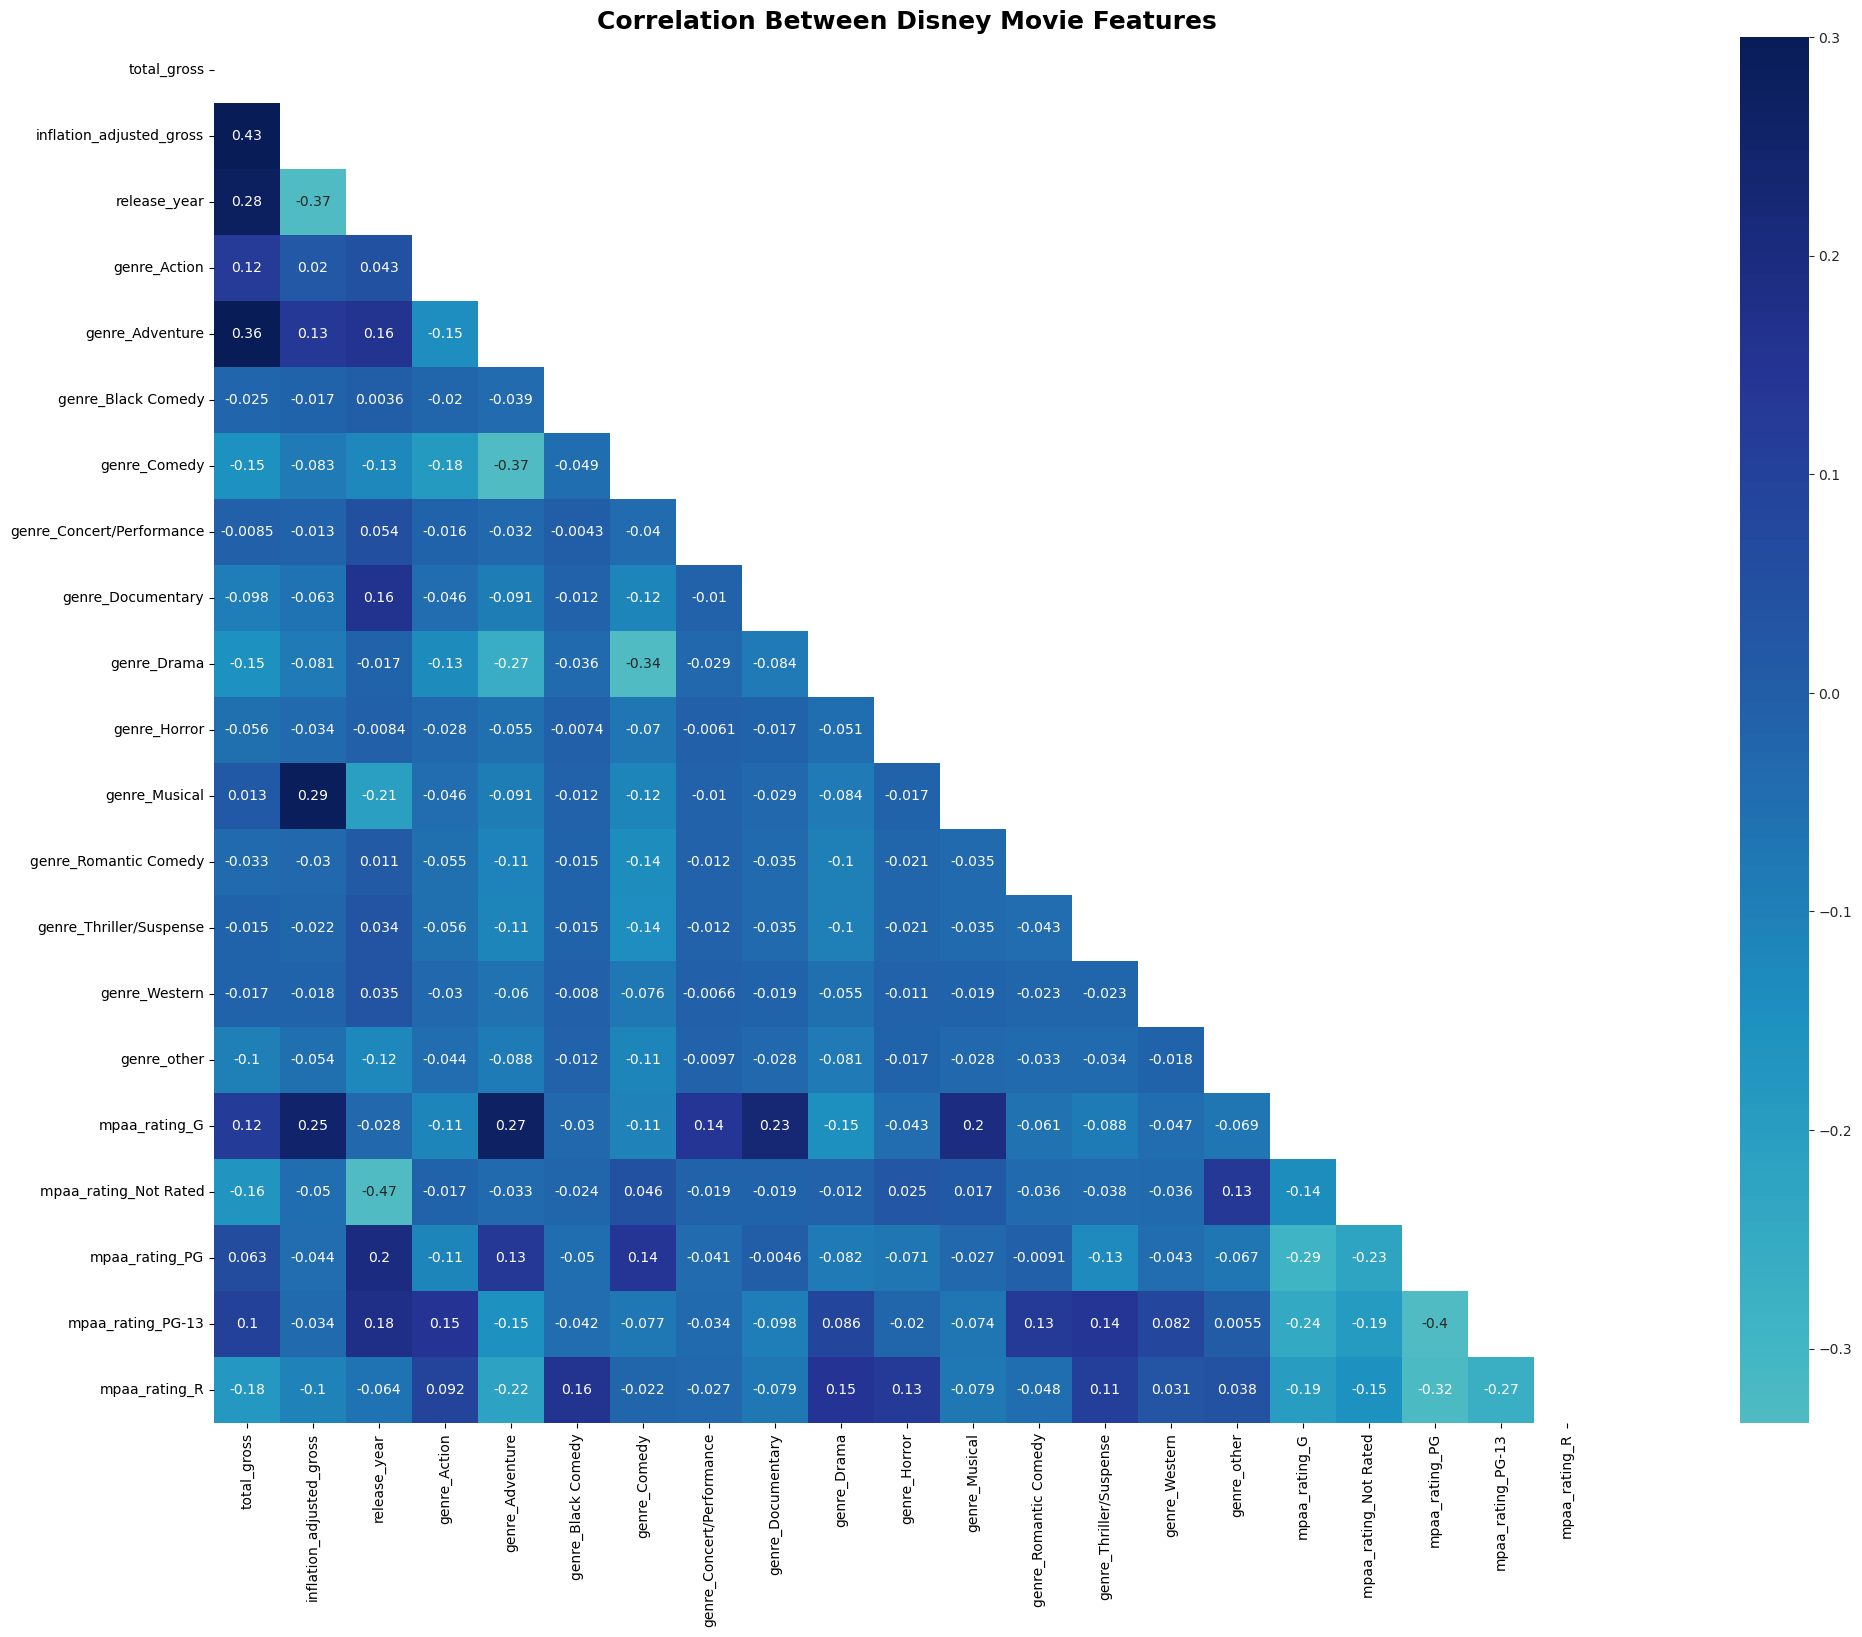

In [16]:
# plot a coorelation heatmap with these features
plt.figure(figsize=(36,18))

mask=np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True

ax=plt.axes()
with sn.axes_style("white"):
    sn.heatmap(df1.corr(), mask=mask, vmax=0.3, square=True, annot=True, cmap="YlGnBu", robust=True, ax=ax, center=-0.3)
    
    ax.set_title('Correlation Between Disney Movie Features', fontsize=18, weight='bold')

Points to note from the heatmap:
-Musical and adventure are the highest rated genres
-G rated movies are more successful, also they are either adventure, documentary or musical
-Dramas, comedies and documentaries are least successful
-Movies rated R, PG, PG-13 are least successful
-Not Rated movies are below average
-Their exist a negative coorelation between release year and the gross revenue


In [17]:
df1['inflation_adjusted_gross'].describe()

count    5.750000e+02
mean     1.195887e+08
std      2.869079e+08
min      2.984000e+03
25%      2.360310e+07
50%      5.541762e+07
75%      1.195395e+08
max      5.228953e+09
Name: inflation_adjusted_gross, dtype: float64

# 4. Modelling

In [18]:
x = df1.drop(['movie_title', 'total_gross', 'inflation_adjusted_gross', 'release_date'], axis='columns')
x

,release_year,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,genre_other,mpaa_rating_G,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
0,1937,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1940,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1940,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1946,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1950,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2016,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
575,2016,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
576,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
577,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
y = df1['inflation_adjusted_gross']
y

0      5228953251
1      2188229052
2      2187090808
3      1078510579
4       920608730
          ...    
574      12545979
575       8874389
576     232532923
577     246082029
578     529483936
Name: inflation_adjusted_gross, Length: 575, dtype: int64

In [20]:
# splitting train and test data
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Training linear regression 
lr = LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_test,y_test)

0.416264576353805

In [23]:
# Training Lasso
l = Lasso()
lr.fit(x_train, y_train)

lr.score(x_test,y_test)

0.416264576353805

In [24]:
# Training SVM
svr = SVR(kernel='linear', C=300)

svr.fit(x_train, y_train)
svr.score(x_test, y_test)

-0.041436852932849266

In [25]:
# Training decision tree
dt = DecisionTreeRegressor(random_state=0)

dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.7272922652200392

In [26]:
# Training random forest
forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.7413896066419812

In [27]:
# since Random forest gave best accuracy we need to find best parameters
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print('\n*** {} Best parameters ***'.format(model_str))
    for k in param_dict:
        print("{}:{}".format(k, param_dict[k]))
    print()
    
param_grid_rf = dict(n_estimators=[20],
                    max_depth=np.arange(1,13,2),
                    min_samples_split=[2],
                    min_samples_leaf=(1,15,2,int),
                    bootstrap=[True,False])

forest = GridSearchCV(RandomForestRegressor(random_state=22), param_grid=param_grid_rf, verbose=3)

forest.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.422 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.158 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.291 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.428 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=-0.037 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.123 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.153 total time=   0.0s
[CV 3/5] EN

[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.264 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.551 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=-0.299 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.241 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.324 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.066 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samp

[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=0.113 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20;, score=-1.210 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=-0.002 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=-0.001 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.330 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=-0.038 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, min_samples_leaf=<cl

[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.701 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.194 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.490 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.454 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=-0.487 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=<class 'int'>, min_samples_split=2, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, min_s

C:\Users\firoz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\firoz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\firoz\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\firoz\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\firoz\anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestRegressor(random_state=22),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': (1, 15, 2, <class 'int'>),
                         'min_samples_split': [2], 'n_estimators': [20]},
             verbose=3)

In [28]:
# Print score and params
print(forest.score(x_test,y_test))
print_best_params(forest)

0.7375411910229808

*** RandomForestRegressor Best parameters ***
bootstrap:True
ccp_alpha:0.0
criterion:squared_error
max_depth:1
max_features:auto
max_leaf_nodes:None
max_samples:None
min_impurity_decrease:0.0
min_samples_leaf:2
min_samples_split:2
min_weight_fraction_leaf:0.0
n_estimators:20
n_jobs:None
oob_score:False
random_state:22
verbose:0
warm_start:False



In [29]:
pred_df = pd.DataFrame(forest.predict(x_test), columns=['Pred'])
actual_df = pd.DataFrame(np.asarray(y_test), columns=['actual'])
cm = pd.concat([actual_df, pred_df], axis=1)
cm

,actual,Pred
0,148619029,1.027704e+08
1,77372445,1.027704e+08
2,6858345,1.027704e+08
3,26062188,1.027704e+08
4,47809421,1.027704e+08
...,...,...
110,88467531,1.027704e+08
111,50886144,1.027704e+08
112,34917330,1.027704e+08
113,14238144,1.027704e+08


C:\Users\firoz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


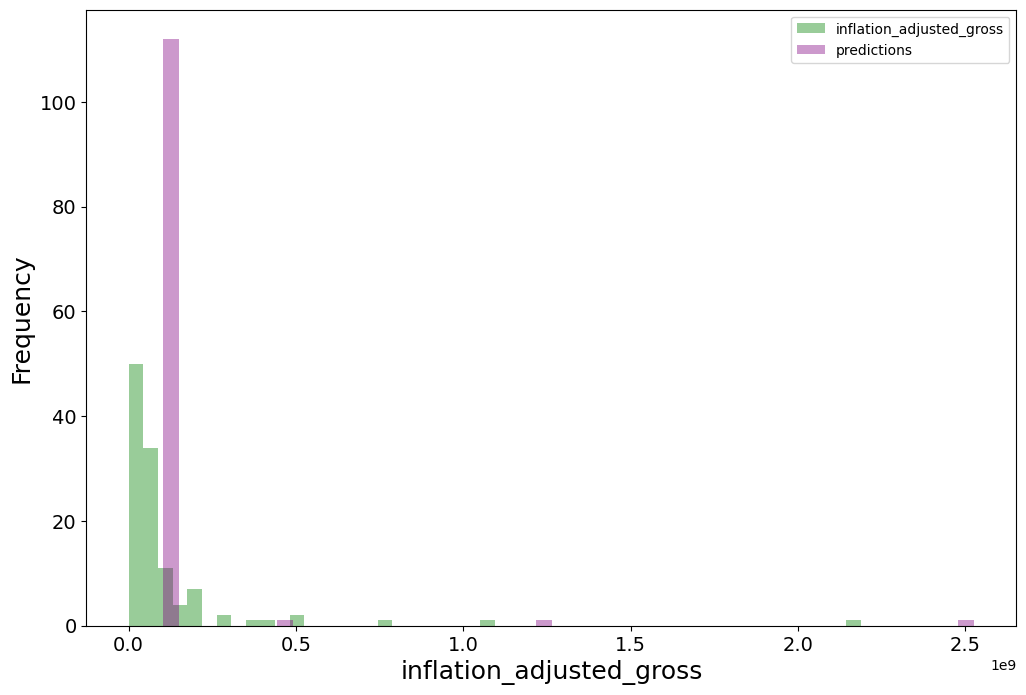

In [30]:
# Actual and predicted distribution
fig,ax =plt.subplots(figsize=(12,8))
sn.distplot(cm['actual'], color='green', kde=False, bins=50, label="inflation_adjusted_gross")
sn.distplot(cm['Pred'], color='purple', kde=False, bins=50, label='predictions')
plt.xlabel('inflation_adjusted_gross', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')

<AxesSubplot:ylabel='actual'>

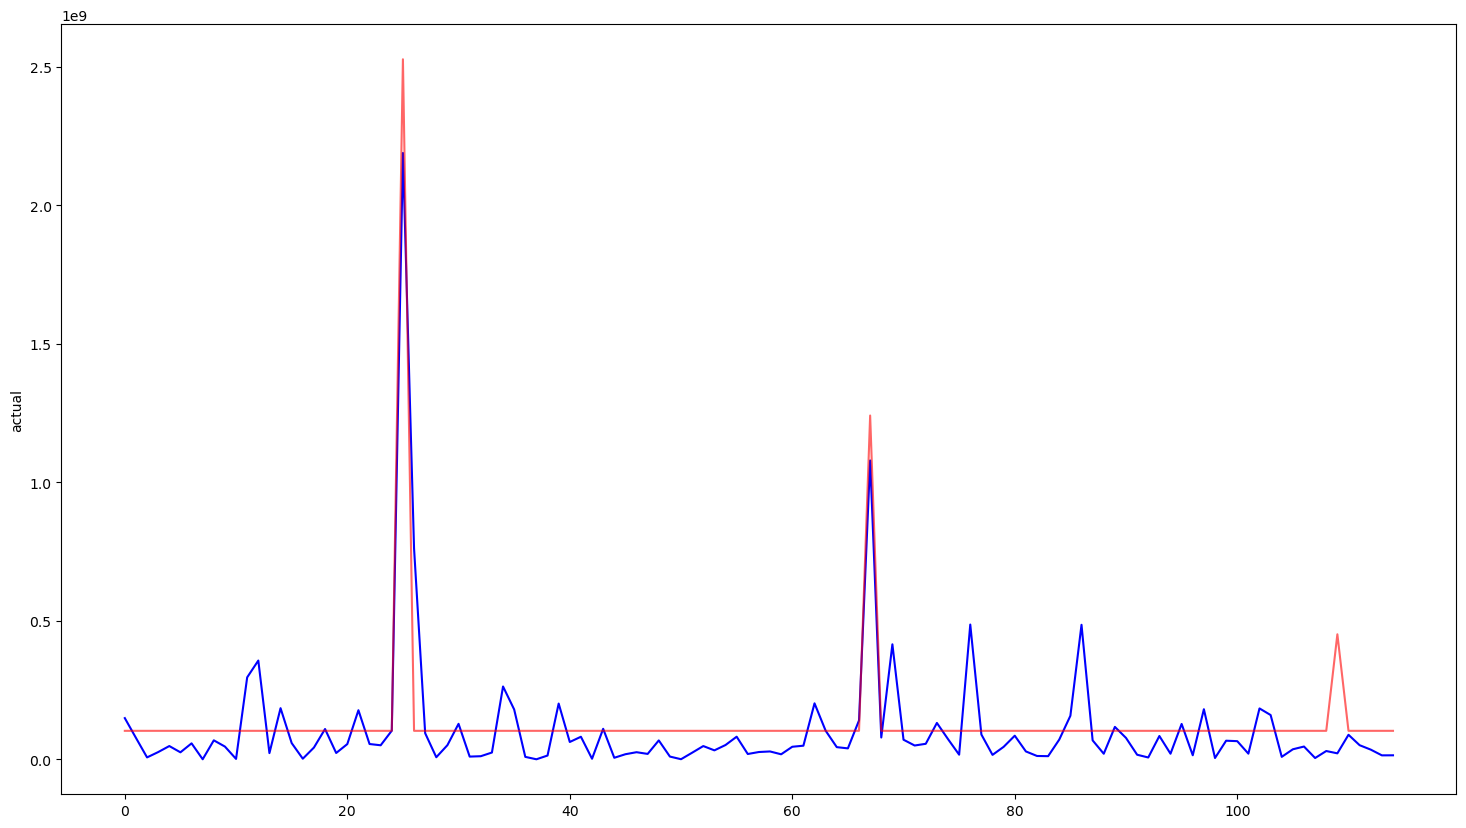

In [31]:
# Actual and predicted values on test data visualisation
plt.figure(figsize=(18,10))

sn.lineplot(x=cm.index.values, y=cm.actual, color='blue')
sn.lineplot(x=cm.index.values, y=cm.Pred, color='red', alpha=0.6)

Here we tried Linear regression, SVM, Decision tree and Random forest with grid searchcv and the best score is approximately 74%.